# নেচা্রাল ল্যাঙ্গুয়েজ প্রোসেসিং


### when we use the image classification and other numerial data analysis we use numerical value and feed them into nura network.it is relatively easy becuse in image we deal with numbers and numbers are easy to feed in the nural network

## but now a question arrives is how you feed text and and senteces in the nural network?

### well thats right we cant directly feed the character or word in the nural network . but we can encode the word in a sentences with number and then feed them to the network.lets talk about the word encoding

# word encoding

* lets assume a sentences "i love to eat burger"
* we can encode them into like this
* ["i"=>1 ,"love"=>2 ,"to"=>3 ,"eat"=>4, "burger"=>5]
* so the encoded sentences will be [1,2,3,4,5]
* so there lets add a new word "rice" lets give him a number 6
* so if i tell you that [1,2,3,4,6] is the word encoding you can say that the
* the person love to eat rice
* thats how you can find the simillarity


## lets go to code and create this

In [1]:
!pip install tensorflow==2.0.0
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer ## this is used to creatw word token


In [0]:
sentences = [
    "i love to eat burger",
    "i love to eat rice"
]

In [3]:
tokenizer = Tokenizer(num_words = 100)  ## num_words means how many word it will tokenize max
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index

print (word_index)

{'i': 1, 'love': 2, 'to': 3, 'eat': 4, 'burger': 5, 'rice': 6}


### a question may arise that if i use "i love to eat rice!!" . so we add the [!!] after the senteces . should this be treated as a different word ??

# NO 
### lets find out


In [0]:
sentences2 = [
    "i love to eat burger",
    "i love to eat rice!!!"
]

In [5]:
tokenizer = Tokenizer(num_words = 100)  ## num_words means how many word it will tokenize max
tokenizer.fit_on_texts(sentences2)
word_index = tokenizer.word_index

print (word_index)

{'i': 1, 'love': 2, 'to': 3, 'eat': 4, 'burger': 5, 'rice': 6}


### you can clearly see it strips out the puncuation . so tensorflow does all the heavy lifting for us

# so whats next ??

* so we make a dictionary of all the words encoded with numbers
* so the next thing we do is to based on this encoding we convert all the sentences in to list of numbers

### so we create the tokenizer with the sentences2 list lets convert them in to list of numbers

In [0]:
sequences = tokenizer.texts_to_sequences(sentences2)

In [7]:
print (sequences)

[[1, 2, 3, 4, 5], [1, 2, 3, 4, 6]]


### so we can see we can convert them in to list of numbers

### now the tokenizer is traiend with the sentences .what happen if we try to use the tokenizer to tokenize new list of sentences? lets find out

In [0]:
sentences3 = [
    "i love to eat burger",
    "i love to eat rice!!!",
    "you love to eat tea"
]

### lets try to tokenize this with the tokenizer we just made

In [0]:
sequence3 = tokenizer.texts_to_sequences(sentences3)

In [10]:
word_index

{'burger': 5, 'eat': 4, 'i': 1, 'love': 2, 'rice': 6, 'to': 3}

In [11]:
print(sequence3)

[[1, 2, 3, 4, 5], [1, 2, 3, 4, 6], [2, 3, 4]]


* you can see that the tokenizer cant tokenize the "you" and the "tea".
* thats because thats new words and it is called "out of the vocab/OOV"
* so in real life we will face a lot of unknown words or OOV . how do we handle it
* lets find out

In [12]:
sentences2 = [
    "i love to eat burger",
    "i love to eat rice!!!"
]
tokenizer = Tokenizer(num_words = 100,oov_token="<OOV>")  ## num_words means how many word it will tokenize max
tokenizer.fit_on_texts(sentences2)
word_index = tokenizer.word_index

print (word_index)

{'<OOV>': 1, 'i': 2, 'love': 3, 'to': 4, 'eat': 5, 'burger': 6, 'rice': 7}


In [13]:
sentences3 = [
    "i love to eat burger",
    "i love to eat rice!!!",
    "you love to eat tea"
]
sequence3 = tokenizer.texts_to_sequences(sentences3)
print(sequence3)

[[2, 3, 4, 5, 6], [2, 3, 4, 5, 7], [1, 3, 4, 5, 1]]


* what we did? we pass a parameter called oov_token and give them a value
* it will create a number for that and after that in a new word that is out of the vocab . it will be replaced with this number . in this case 1

# PADDING

### if you did image processing before you know that we need to make the image uniform in size before feed it to the nural network.you cant just feed the nural network any size you want. in language processing you have to do the exact same thing. so you have to make sure that the data you are feeding must be uniform i size.

### how to do that ??
### padding !!!!!

### lets make this previous sequences that we create uniform in size

In [0]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [0]:
padded_data = pad_sequences(sequence3)

In [16]:
print (padded_data)

[[2 3 4 5 6]
 [2 3 4 5 7]
 [1 3 4 5 1]]


### lets make another example where the sentences are different in size 

In [17]:
sentences4 = [
    "i love to eat burger",
    "i love to eat rice!!!",
    "you love to eat tea",
    "i love to eat rice and biriyani and with borhani"
]
sequence4 = tokenizer.texts_to_sequences(sentences4)
print(sequence4)

[[2, 3, 4, 5, 6], [2, 3, 4, 5, 7], [1, 3, 4, 5, 1], [2, 3, 4, 5, 7, 1, 1, 1, 1, 1]]


In [0]:
padded_dat2 = pad_sequences(sequence4)

In [19]:
print (padded_dat2)

[[0 0 0 0 0 2 3 4 5 6]
 [0 0 0 0 0 2 3 4 5 7]
 [0 0 0 0 0 1 3 4 5 1]
 [2 3 4 5 7 1 1 1 1 1]]


1. so you can see that all the data is padded out as a matrix 
1. and each row has the same length
1. and it is achived by putting zero in the front

1. ### now we can add this zero at the end insted of at the beginning
1. ### lets do that now

In [0]:
padded_data3 = pad_sequences(sequence4,padding="post")

In [21]:
padded_data3

array([[2, 3, 4, 5, 6, 0, 0, 0, 0, 0],
       [2, 3, 4, 5, 7, 0, 0, 0, 0, 0],
       [1, 3, 4, 5, 1, 0, 0, 0, 0, 0],
       [2, 3, 4, 5, 7, 1, 1, 1, 1, 1]], dtype=int32)

### now you can actually use  a parameter "max_length" that will truncate the matrix into smaller matrix based on your need . but remember you will lose data if you do it .so do it carefully 

In [0]:
padded_data4 = pad_sequences(sequence4,padding="post",maxlen=5)

In [23]:
padded_data4

array([[2, 3, 4, 5, 6],
       [2, 3, 4, 5, 7],
       [1, 3, 4, 5, 1],
       [1, 1, 1, 1, 1]], dtype=int32)

## Ok upto this point we use  a very small data . now we will start our first project.

# SARCASM Detection
### we use the sarcasm dataset and classify this data into to category

### 1) sarcastic
### 2) not sarcastic

## lets start out first project

![](http://i7.pngguru.com/preview/855/634/473/t-shirt-hoodie-sheldon-cooper-bazinga-spreadshirt-the-big-bang-theory-thumbnail.jpg)

## Download the data

In [24]:
## download the data in json format
! wget http://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json

--2020-02-22 01:19:38--  http://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.4.144, 2607:f8b0:4007:802::2010
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.4.144|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘sarcasm.json.3’

sarcasm.json.3      100%[===================>]   5.38M  --.-KB/s    in 0.03s   

2020-02-22 01:19:38 (194 MB/s) - ‘sarcasm.json.3’ saved [5643545/5643545]



* this is a json data
* and there are three keys
* 1) sentences [which we classify]
* 2) lables [marked as 'sarcastic' and 'not sarcastic' ]
* 3) urls [we are not going to use it]

## load the data

In [0]:
import json
with open('sarcasm.json','r') as f:
    data = json.load(f)

In [26]:
### lets see a portion of data
data[:5]

[{'article_link': 'https://www.huffingtonpost.com/entry/versace-black-code_us_5861fbefe4b0de3a08f600d5',
  'headline': "former versace store clerk sues over secret 'black code' for minority shoppers",
  'is_sarcastic': 0},
 {'article_link': 'https://www.huffingtonpost.com/entry/roseanne-revival-review_us_5ab3a497e4b054d118e04365',
  'headline': "the 'roseanne' revival catches up to our thorny political mood, for better and worse",
  'is_sarcastic': 0},
 {'article_link': 'https://local.theonion.com/mom-starting-to-fear-son-s-web-series-closest-thing-she-1819576697',
  'headline': "mom starting to fear son's web series closest thing she will have to grandchild",
  'is_sarcastic': 1},
 {'article_link': 'https://politics.theonion.com/boehner-just-wants-wife-to-listen-not-come-up-with-alt-1819574302',
  'headline': 'boehner just wants wife to listen, not come up with alternative debt-reduction ideas',
  'is_sarcastic': 1},
 {'article_link': 'https://www.huffingtonpost.com/entry/jk-rowling-w

## lets make a sentences and label array and separate this 

In [0]:
sentences = []
labels = []

for item in data:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])

In [28]:
sentences[:5]

["former versace store clerk sues over secret 'black code' for minority shoppers",
 "the 'roseanne' revival catches up to our thorny political mood, for better and worse",
 "mom starting to fear son's web series closest thing she will have to grandchild",
 'boehner just wants wife to listen, not come up with alternative debt-reduction ideas',
 'j.k. rowling wishes snape happy birthday in the most magical way']

In [29]:
labels[:5]

[0, 0, 1, 1, 0]

## train test split the dta

In [0]:
training_size = 20000
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

## lets tokenize the train data just like we did before

In [0]:
vocab_size = 10000
oov_token = "<OOV>"
tokenizer = Tokenizer(num_words=vocab_size,oov_token=oov_token)

In [0]:
tokenizer.fit_on_texts(training_sentences)

In [0]:
word_index = tokenizer.word_index

In [34]:
word_index.__len__()

25637

## now just like before we create the sequences of encoded array

In [0]:
training_sequences = tokenizer.texts_to_sequences(training_sentences)

In [36]:
training_sequences.__len__()

20000

## so now we have to pad them to make a uniform shape

In [0]:
training_padded = pad_sequences(training_sequences,maxlen=32,padding="post",truncating="post")

In [38]:
training_padded.shape

(20000, 32)

## now lets padd the test data based with the tokenizer train on the training_sentences

In [0]:
testing_sequnces = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequnces,maxlen=32,padding="post",truncating="post")

In [40]:
testing_padded.shape

(6709, 32)

### project 1 tokenize part finished. now  we need to create the nural network
### but before that 
### we need to takh about the 
# EMBADDING LAYER


* uptoo this point we get the dictionary of word and their assoiciate value
* but ti get sentiment out of this value we use Embadding layer for the feture extraction in image processing
### Embedding will create vectors out of n dimensional space and the simmilar word will have the same direction in this dimension this is how we get the sentiment out of the data

### Embedding is one the most powerfull tools in NLP 

# Lets make the nural network

In [0]:
def nural_net(vocab_size,embedding_dim,max_length):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Embedding(vocab_size,embedding_dim,input_length=max_length))
    model.add(tf.keras.layers.GlobalAveragePooling1D())
    model.add(tf.keras.layers.Dense(24,activation='relu'))
    model.add(tf.keras.layers.Dense(1,activation='sigmoid'))
    model.compile(loss='binary_crossentropy',optimizer = 'adam',metrics=['accuracy'])
    return model





## we will use the 16 dimension Embedding layer and max_length of the matrix is 32 and vocab_size os 1000

## you can use differently if you want

In [0]:
vocab_size = 10000
embedding_dim = 16
max_length = 32

In [0]:
sarcasm_model = nural_net(vocab_size,embedding_dim,max_length)

In [44]:
sarcasm_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 32, 16)            160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 24)                408       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 25        
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [0]:
import numpy as np
training_labels = np.array(training_labels)
testing_labels = np.array(testing_labels)

## lets train the model

In [0]:
num_epochs = 30
history = sarcasm_model.fit(training_padded,training_labels,epochs=num_epochs,validation_data=(testing_padded,testing_labels),verbose=0)

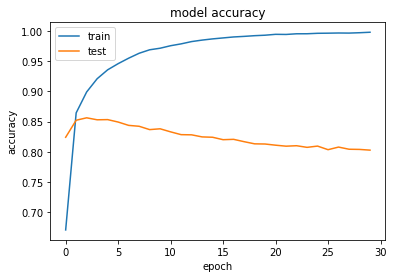

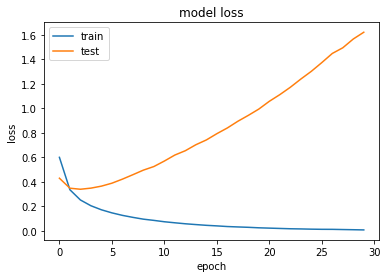

In [47]:
# summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Project 2 . BBC news sentiment analysis 

![](http://www.wvtf.org/sites/wvtf/files/styles/x_large/public/201910/2019-bbc-news-tile-world-service-rgb.png)

## import the data

In [48]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/bbc-text.csv

--2020-02-22 01:20:50--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/bbc-text.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.14.112, 2607:f8b0:4007:80d::2010
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.14.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5057493 (4.8M) [application/octet-stream]
Saving to: ‘bbc-text.csv’

bbc-text.csv        100%[===================>]   4.82M  --.-KB/s    in 0.08s   

2020-02-22 01:20:50 (60.1 MB/s) - ‘bbc-text.csv’ saved [5057493/5057493]



In [0]:
## adding the stopwords
stopwords = [ "a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]


### its exactly like the sarcasm data insted its a news data and label 
### are the topic name of the news 'business', 'entertainment', 'politics', 'sport', 'tech'

In [0]:
import csv

In [0]:
sentences = []
labels = []
with open("bbc-text.csv", 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    next(reader)
    for row in reader:
        labels.append(row[0])
        sentence = row[1]
        for word in stopwords:
            token = " " + word + " "
            sentence = sentence.replace(token, " ")
        sentences.append(sentence)

In [52]:
sentences[:2]

['tv future hands viewers home theatre systems  plasma high-definition tvs  digital video recorders moving living room  way people watch tv will radically different five years  time.  according expert panel gathered annual consumer electronics show las vegas discuss new technologies will impact one favourite pastimes. us leading trend  programmes content will delivered viewers via home networks  cable  satellite  telecoms companies  broadband service providers front rooms portable devices.  one talked-about technologies ces digital personal video recorders (dvr pvr). set-top boxes  like us s tivo uk s sky+ system  allow people record  store  play  pause forward wind tv programmes want.  essentially  technology allows much personalised tv. also built-in high-definition tv sets  big business japan us  slower take off europe lack high-definition programming. not can people forward wind adverts  can also forget abiding network channel schedules  putting together a-la-carte entertainment. u

In [53]:
set(labels)

{'business', 'entertainment', 'politics', 'sport', 'tech'}

## train test split

In [0]:
## train test split
## we will do a 80-20 % split
train_size = int(len(sentences) * .8)

train_sentences = sentences[:train_size]
train_labels = labels[:train_size]

validation_sentences = sentences[train_size:]
validation_labels = labels[train_size:]

## tokenize the training data

In [0]:
tokenizer = Tokenizer(num_words = 1000, oov_token="<OOV>")
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index

* ## create the sequences just like before

In [0]:
train_sequences = tokenizer.texts_to_sequences(train_sentences)
train_padded = pad_sequences(train_sequences, padding="post", maxlen=120)

## create the testing sequences

In [0]:
validation_sequences = tokenizer.texts_to_sequences(validation_sentences)
validation_padded = pad_sequences(validation_sequences, padding="post", maxlen=120)

## since the target value is not numeric so we need to tokenize the target too

In [0]:

label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(labels)

## so we tokenize the labels and convert to numpy array
## you must convert it to numpy array

In [0]:
training_label_seq = np.array(label_tokenizer.texts_to_sequences(train_labels))

In [0]:
validation_label_seq = np.array(label_tokenizer.texts_to_sequences(validation_labels))

In [0]:
def bbc_nural_net(vocab_size,embedding_dim,max_length):
    model = tf.keras.Sequential([
        tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
        tf.keras.layers.GlobalAveragePooling1D(),
        tf.keras.layers.Dense(24, activation='relu'),
        tf.keras.layers.Dense(6, activation='softmax')
    ])
    model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
    return model

In [0]:
bbc_model = bbc_nural_net(1000,16,120)

In [0]:
num_epochs = 30
history = bbc_model.fit(train_padded, training_label_seq, epochs=num_epochs, validation_data=(validation_padded, validation_label_seq), verbose=0)

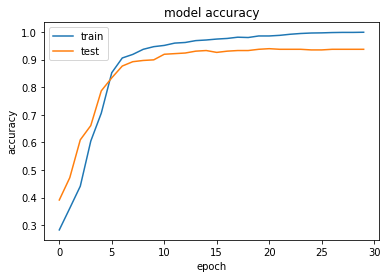

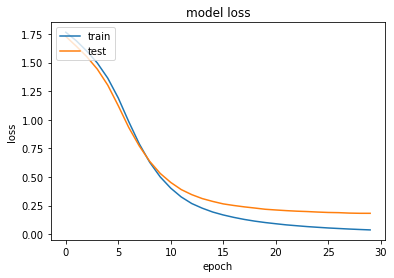

In [64]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Recurrent Nural Net

# the meaning of the sentences not only depend on the existence of the word in the sentences but also the sequences of the word. same word in a different sequnces can show different even totally opposite meaning . thats where the LSTM comes.LSTM stands for long short term memory.it memorize the sequences and LSTM uses Cell state so relevent word can be used after when it is necessary,cell state can be unidirectional but it can be bidirectional too. so the later content can be used in the previous too

## lets use the same sarcasm and BBC news data with LSTM bidirectional layer

In [0]:
import json
with open('sarcasm.json','r') as f:
    data = json.load(f)
sentences = []
labels = []

for item in data:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])
training_size = 20000
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]
vocab_size = 10000
oov_token = "<OOV>"
tokenizer = Tokenizer(num_words=vocab_size,oov_token=oov_token)
tokenizer.fit_on_texts(training_sentences)
training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences,maxlen=32,padding="post",truncating="post")
testing_sequnces = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequnces,maxlen=32,padding="post",truncating="post")
vocab_size = 10000
embedding_dim = 32
max_length = 32

In [66]:
lstm_sarcasm_model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
import numpy as np
lstm_sarcasm_model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

num_epochs = 20
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)
history = lstm_sarcasm_model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels))

Train on 20000 samples, validate on 6709 samples
Epoch 1/20
20000/20000 [==============================] - 19s 925us/sample - loss: 0.3938 - accuracy: 0.8093 - val_loss: 0.3281 - val_accuracy: 0.8556
Epoch 2/20
20000/20000 [==============================] - 15s 745us/sample - loss: 0.2084 - accuracy: 0.9147 - val_loss: 0.3426 - val_accuracy: 0.8584
Epoch 3/20
20000/20000 [==============================] - 16s 788us/sample - loss: 0.1263 - accuracy: 0.9535 - val_loss: 0.4395 - val_accuracy: 0.8484
Epoch 4/20
20000/20000 [==============================] - 15s 768us/sample - loss: 0.0750 - accuracy: 0.9733 - val_loss: 0.5083 - val_accuracy: 0.8468
Epoch 5/20
20000/20000 [==============================] - 16s 796us/sample - loss: 0.0460 - accuracy: 0.9848 - val_loss: 0.6106 - val_accuracy: 0.8450
Epoch 6/20
20000/20000 [==============================] - 15s 769us/sample - loss: 0.0297 - accuracy: 0.9904 - val_loss: 0.7343 - val_accuracy: 0.8369
Epoch 7/20
20000/20000 [=====================

In [67]:
lstm_sarcasm_model.evaluate(testing_padded, testing_labels)

6709/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[1.3928002089213145, 0.82829034]

In [68]:
accuracy = lstm_sarcasm_model.evaluate(testing_padded, testing_labels)[1] * 100

6709/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [69]:
accuracy

82.8290343284607

## lets use the BBC data with Bidirectional LSTM

In [0]:
sentences = []
labels = []
with open("bbc-text.csv", 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    next(reader)
    for row in reader:
        labels.append(row[0])
        sentence = row[1]
        for word in stopwords:
            token = " " + word + " "
            sentence = sentence.replace(token, " ")
        sentences.append(sentence)
## train test split
## we will do a 80-20 % split
train_size = int(len(sentences) * .8)

train_sentences = sentences[:train_size]
train_labels = labels[:train_size]

validation_sentences = sentences[train_size:]
validation_labels = labels[train_size:]
tokenizer = Tokenizer(num_words = 1000, oov_token="<OOV>")
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index
train_sequences = tokenizer.texts_to_sequences(train_sentences)
train_padded = pad_sequences(train_sequences, padding="post", maxlen=120)
validation_sequences = tokenizer.texts_to_sequences(validation_sentences)
validation_padded = pad_sequences(validation_sequences, padding="post", maxlen=120)

label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(labels)
training_label_seq = np.array(label_tokenizer.texts_to_sequences(train_labels))
validation_label_seq = np.array(label_tokenizer.texts_to_sequences(validation_labels))

In [0]:
bbc_lstm_model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=120),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(6, activation='sigmoid')
])
bbc_lstm_model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [72]:
history = bbc_lstm_model.fit(train_padded, training_label_seq, epochs=20)

Train on 1780 samples
Epoch 1/20
1780/1780 [==============================] - 7s 4ms/sample - loss: 1.6663 - accuracy: 0.2112
Epoch 2/20
1780/1780 [==============================] - 4s 2ms/sample - loss: 1.6052 - accuracy: 0.2303
Epoch 3/20
1780/1780 [==============================] - 4s 2ms/sample - loss: 1.5971 - accuracy: 0.2303
Epoch 4/20
1780/1780 [==============================] - 4s 2ms/sample - loss: 1.5491 - accuracy: 0.2315
Epoch 5/20
1780/1780 [==============================] - 5s 3ms/sample - loss: 1.4893 - accuracy: 0.2478
Epoch 6/20
1780/1780 [==============================] - 4s 2ms/sample - loss: 1.2639 - accuracy: 0.3624
Epoch 7/20
1780/1780 [==============================] - 4s 2ms/sample - loss: 1.1838 - accuracy: 0.4219
Epoch 8/20
1780/1780 [==============================] - 4s 2ms/sample - loss: 0.9739 - accuracy: 0.5382
Epoch 9/20
1780/1780 [==============================] - 4s 2ms/sample - loss: 0.8147 - accuracy: 0.5843
Epoch 10/20
1780/1780 [===================

In [73]:
bbc_lstm_model.evaluate(validation_padded,validation_label_seq)

445/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.47659026170044805, 0.8808989]

## third project IMDB MOVIE Review 

![](http://miro.medium.com/max/9354/1*WgMZ_JII2WFKMIEtbWeTHg.jpeg)

## this project will classify the imdb movie review . one thing you must remember i will fetch the data from the tensorflow-dataset module so it will give me some extra method to work with.but the methodology remains the same.you can use the previous showing step and it will work just fine

In [74]:
!pip install tensorflow-datasets
import tensorflow_datasets as tfds

## you must remember we are dwnloading the imdb subword version so the sequence of the word is very important you shuould use Recurrent Nural Net for that 

In [75]:
# Get the data
!pip3 install --upgrade tensorboard
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)

  Using cached https://files.pythonhosted.org/packages/40/23/53ffe290341cd0855d595b0a2e7485932f473798af173bbe3a584b99bb06/tensorboard-2.1.0-py3-none-any.whl
ERROR: tensorflow 2.0.0 has requirement tensorboard<2.1.0,>=2.0.0, but you'll have tensorboard 2.1.0 which is incompatible.
  Found existing installation: tensorboard 2.0.2
    Uninstalling tensorboard-2.0.2:
      Successfully uninstalled tensorboard-2.0.2


## data is already splitted into train and test

In [0]:
train_dataset, test_dataset = dataset['train'], dataset['test']


## now to tokenize we just use their given method

In [0]:
tokenizer = info.features['text'].encoder


## this is only applicable the data that is avilable in tensorflow-datasets
## you can download the csv version and do it manually like before

## shuffle the data

In [0]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_dataset))

1. ## create the same model with LSTM

In [0]:
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [0]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

## i am going to give just epochs=1 because this is a very big dataset and take a lot of time . if you have enough time please increase the epochs

In [81]:
NUM_EPOCHS = 1
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

391/391 [==============================] - 1044s 3s/step - loss: 0.5257 - accuracy: 0.7343 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00


In [82]:
model.evaluate(test_dataset)

391/391 [==============================] - 178s 454ms/step - loss: 0.4885 - accuracy: 0.8179


[0.488478414771502, 0.81792]

## you can actualy use convolutional layer for extracting feture

In [0]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [84]:
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
NUM_EPOCHS = 1
history = model2.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

391/391 [==============================] - 220s 561ms/step - loss: 0.4380 - accuracy: 0.7863 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00


In [85]:
model2.evaluate(test_dataset)

391/391 [==============================] - 51s 131ms/step - loss: 0.3156 - accuracy: 0.8737


[0.31561451555822817, 0.87368]

## you can use Gated Recurrent unit too lets make another model to see if it does better

In [86]:
model3 = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size,64),
    tf.keras.layers.GRU(32),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model3.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
NUM_EPOCHS = 1
history = model3.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

391/391 [==============================] - 379s 969ms/step - loss: 0.6934 - accuracy: 0.4962 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00


In [87]:
model3.evaluate(test_dataset)

391/391 [==============================] - 58s 148ms/step - loss: 0.6931 - accuracy: 0.5009


[0.6931416674343216, 0.50092]